Training Accuracy: 1.00
Testing Accuracy: 1.00


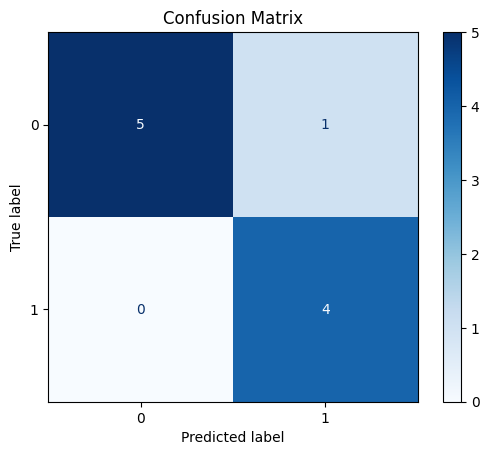


Example prediction for a new student:
Probability of acceptance: 0.91


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

# Read the dataset
df = pd.read_csv("studentRecords.csv")

# Convert Yes/No to 1/0 for binary features
df['Mini Project Experience'] = df['Mini Project Experience'].map({'Yes': 1, 'No': 0})
df['Internship Completed'] = df['Internship Completed'].map({'Yes': 1, 'No': 0})

# Select features for prediction
features = ['CGPA', 'GRE Score', 'GMAT Score', 'TOEFL Score', 
           'Research Articles', 'Mini Project Experience', 'Internship Completed']

X = df[features]
# For demonstration, we'll consider students with CGPA >= 8.0 as "accepted"
y = (df['CGPA'] >= 8.0).astype(int)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.2f}")
print(f"Testing Accuracy: {test_score:.2f}")
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
# Function to predict probability for new students
def predict_admission(student_data):
    student_scaled = scaler.transform(student_data)
    prob = model.predict_proba(student_scaled)[0][1]
    return prob

# Example prediction
print("\nExample prediction for a new student:")
new_student = pd.DataFrame([[8.5, 320, 650, 110, 2, 1, 1]], columns=features)
probability = predict_admission(new_student)
print(f"Probability of acceptance: {probability:.2f}")